In [63]:
import numpy as np
import scipy.io as sio
import os

# Load the .mat files
data1 = sio.loadmat('BHI_assems.mat')
data2 = sio.loadmat('BHI_inferred_params.mat')

In [64]:
relabus = data1['relabus'].T
relabus = relabus[:,105:]
relabus[np.isnan(relabus)] = 0

R_inf = data2['R_inf']
G = (R_inf > 0).astype(float)
G = G[:, 13:]

# g2f = np.array([1, 2, 3, 4, 3, 3, 3, 1, 3, 1, 3, 4, 3, 4, 5])

# G= np.zeros((15, 5))
# for i in range(15):
#     G[i, g2f[i] - 1] = 1  # 调整索引，MATLAB 索引从 1 开始，Python 索引从 0 开始

inds2del = (relabus[1, :] == 0)
relabus = relabus[:, ~inds2del]


relabus = relabus / np.sum(relabus, axis=0, keepdims=True)
N, mm = relabus.shape
N, M = G.shape

mx = np.mean(relabus, axis=1)
n1_orig = np.sum(G, axis=0)
dm_origs = np.zeros(M)

for j in range(M):
    dm_origs[j] = np.log10(np.mean(mx[G[:, j] == 1])) - np.log10(np.mean(mx[G[:, j] == 0]))

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# 设置要绘制的柱状图数目
mm2plot = 30

# 对 relabus 的行求和并按降序排序，获取排序后的索引
sorted_inds_x = np.argsort(np.sum(relabus, axis=1))[::-1]

# 随机选择 mm2plot 个索引进行绘制
inds2plot = np.random.permutation(mm)[:mm2plot]


# 转置 relabus 并选择要绘制的部分
xthis = relabus.T
xthis = xthis[inds2plot, :][:, sorted_inds_x]


xthis.shape

(30, 15)

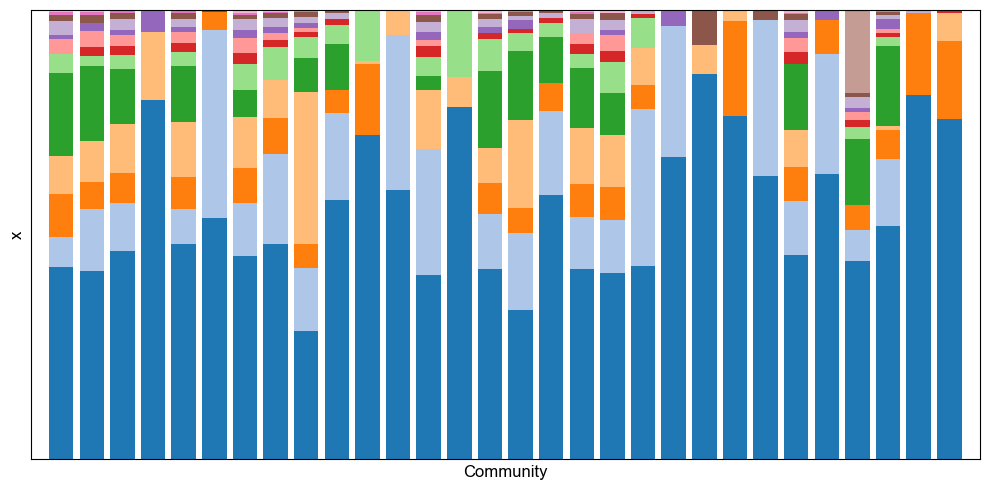

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 data 是一个形状为 (30, 101) 的二维数组
data = xthis

# 归一化数据，使得每列的和为1

# 创建颜色映射对象，包含30种颜色
colors = []
colors.extend(plt.cm.tab20(np.linspace(0, 1, 20)))
colors.extend(plt.cm.tab20b(np.linspace(0, 1, 20)))
colors.extend(plt.cm.tab20c(np.linspace(0, 1, 20)))
colors.extend(plt.cm.Set1(np.linspace(0, 1, 9)))
colors.extend(plt.cm.Paired(np.linspace(0, 1, 12)))
colors.extend(plt.cm.Set2(np.linspace(0, 1, 8)))
colors.extend(plt.cm.Accent(np.linspace(0, 1, 8)))
colors.extend(plt.cm.Set3(np.linspace(0, 1, 12)))
colors = colors[:100]
colors.append(([0,0,0,1]))  # 确保总共101种颜色

# 创建堆叠柱状图
fig, ax = plt.subplots()
x = np.arange(30)  # x轴上的点
bottom = np.zeros(30)  # 底部值的初始化

# 绘制堆叠柱状图
for i in range(N):
    ax.bar(x, data[:, i], bottom=bottom, color=colors[i], edgecolor='none')
    bottom += data[:, i]  # 更新底部值，使得下一个柱子在上一个柱子的顶部

# 设置坐标轴和图形属性
ax.set_xlim([-1, 30])
ax.set_ylim([0, 1])
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('x', fontsize=12, fontname='Arial')
ax.set_xlabel('Community', fontsize=12, fontname='Arial')
ax.tick_params(width=0.5, length=0.0)
ax.minorticks_off()
ax.tick_params(direction='out')
fig.set_size_inches(10, 5) 
fig.tight_layout() 

# 显示图形
plt.show()


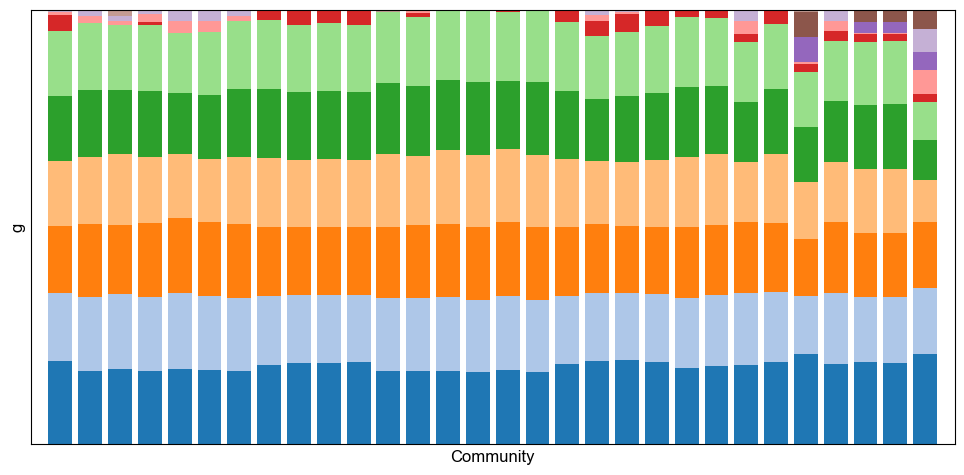

In [67]:
gs = np.dot(relabus.T, G).T
# 排序数据并选择绘制部分
gs = gs / np.sum(gs, axis=0, keepdims=True)
sorted_inds_g = np.argsort(np.mean(gs, axis=1))[::-1]
gs = gs[sorted_inds_g][:, :30]

colors = []
colors.extend(plt.cm.tab20(np.linspace(0, 1, 20)))
colors.extend(plt.cm.tab20b(np.linspace(0, 1, 20)))
colors.extend(plt.cm.tab20c(np.linspace(0, 1, 20)))
colors.extend(plt.cm.Set1(np.linspace(0, 1, 9)))
colors.extend(plt.cm.Paired(np.linspace(0, 1, 12)))
colors.extend(plt.cm.Set2(np.linspace(0, 1, 8)))
colors.extend(plt.cm.Accent(np.linspace(0, 1, 8)))
colors.extend(plt.cm.Set3(np.linspace(0, 1, 12)))
colors = colors[:100]

# 创建图形和坐标轴
fig, ax = plt.subplots()
ax.set_position([0.1, 0.1, 0.8, 0.8])

# 绘制堆叠柱状图
x = np.arange(30)  # x轴上的点
bottom = np.zeros(30)  # 底部值的初始化
bh = []
for i in range(gs.shape[0]):
    b = ax.bar(x, gs[i], bottom=bottom, color=colors[i], edgecolor='none')
    bh.append(b)
    bottom += gs[i]  # 更新底部值，使得下一个柱子在上一个柱子的顶部

ax.set_xlim([-1, 30])
ax.set_ylim([0, 1])
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylabel('g', fontsize=12, fontname='Arial')
ax.set_xlabel('Community', fontsize=12, fontname='Arial')
ax.tick_params(width=0.5, length=0.0)
ax.minorticks_off()
ax.tick_params(direction='out')
fig.set_size_inches(10, 5) 
fig.tight_layout() 

# 显示图形
plt.show()

In [68]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Arial'

def shuffle_matrix_rows(matrix):
    # 对矩阵进行复制，防止原矩阵被修改
    shuffled_matrix = np.copy(matrix)
    # 对于矩阵中的每一行进行随机排列
    for row in shuffled_matrix:
        np.random.shuffle(row)
    return shuffled_matrix


def ConvertToG(G, relabus):
    temp = np.dot(relabus.T, G).T
    return temp / np.sum(temp, axis=0, keepdims=True)

#一种相似度计算方法
def CalculateBC(xthis, ythis):
    return 1 - np.sum(np.minimum(xthis, ythis))

# 计算每列与均值的相似度度量
def CalculateDs(xs):
    mm = xs.shape[1]
    xm = np.mean(xs, axis=1, keepdims=True)
    ds = np.zeros(mm)
    for iii in range(mm):
        ds[iii] = CalculateBC(xs[:, iii], xm.flatten())
    return ds

dg_orig = CalculateDs(ConvertToG(G, relabus))
dg_m_orig = np.mean(dg_orig)

# 模拟
ns = int(1e4)

dg_m_shfls = np.zeros(ns)
for rep in range(ns):
    # 随机按行打乱矩阵G
    G_shuffled = G[np.random.permutation(N), :]
    dg_m_shfls[rep] = np.mean(CalculateDs(ConvertToG(G_shuffled, relabus)))


dg_m_shfls_row = np.zeros(ns)
for rep in range(ns):
    # 打乱每一行G的分布
    #G_shuffled = G[np.random.permutation(N), :]
    G_shuffled = shuffle_matrix_rows(G)
    dg_m_shfls_row[rep] = np.mean(CalculateDs(ConvertToG(G_shuffled, relabus)))

#fig, ax = plt.subplots()

dg_m_shfls_col = np.zeros(ns)
for rep in range(ns):
    # 打乱每一列G的分布
    #G_shuffled = G[np.random.permutation(N), :]
    G_shuffled = shuffle_matrix_rows(G.T).T
    dg_m_shfls_col[rep] = np.mean(CalculateDs(ConvertToG(G_shuffled, relabus)))

#fig, ax = plt.subplots()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_13460\3426175745.py:18: RuntimeWarning: invalid value encountered in divide
  return temp / np.sum(temp, axis=0, keepdims=True)


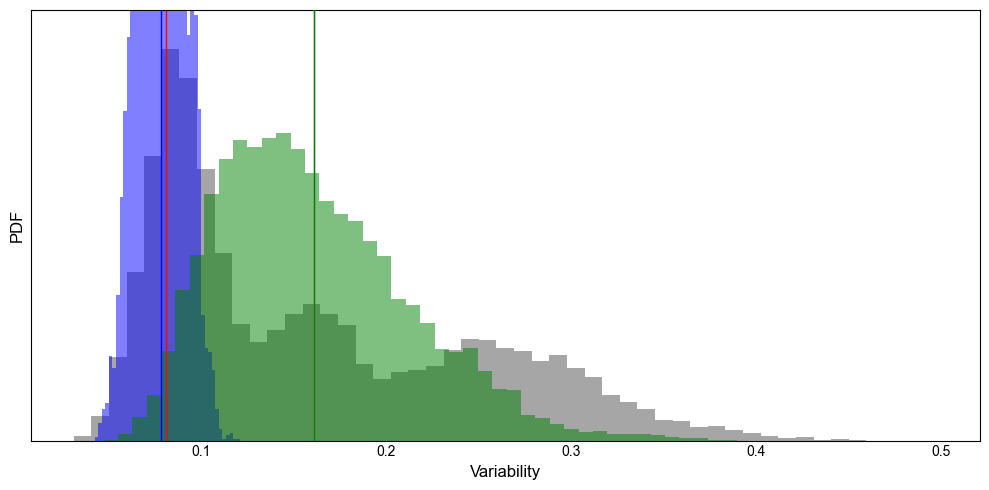

In [69]:
# 可视化
fig, ax = plt.subplots()
dg_m_shfls = dg_m_shfls[~np.isnan(dg_m_shfls)]
xthis = dg_m_shfls
xmin = np.min(xthis)
xmax = np.max(xthis)
bins = np.linspace(xmin * 0.9, xmax * 1.1, 50)
h = ax.hist(xthis, bins=bins, density=True, edgecolor='none', facecolor='grey',alpha=0.7, zorder=1)

# 添加原始 dg 的直线
ymax = np.max(h[0])
ax.plot([dg_m_orig, dg_m_orig], [0, ymax * 1.1], '-', linewidth=1, color='red')
ax.plot([np.mean(dg_m_shfls), np.mean(dg_m_shfls)], [0, ymax * 1.1], '-', linewidth=1, color='grey', zorder=5)

xthis = dg_m_shfls_row
xmin = np.min(xthis)
xmax = np.max(xthis)
bins = np.linspace(xmin * 0.9, xmax * 1.1, 50)
h = ax.hist(xthis, bins=bins, density=True, facecolor='blue',alpha=0.5, zorder=1)
ax.plot([np.mean(dg_m_shfls_row), np.mean(dg_m_shfls_row)], [0, ymax * 1.1], '-', linewidth=1, color='blue', zorder=5)

dg_m_shfls_col = dg_m_shfls_col[~np.isnan(dg_m_shfls_col)]
xthis = dg_m_shfls_col
xmin = np.min(xthis)
xmax = np.max(xthis)
bins = np.linspace(xmin * 0.9, xmax * 1.1, 50)
h = ax.hist(xthis, bins=bins, density=True, facecolor='green',alpha=0.5, zorder=1)
ax.plot([np.mean(dg_m_shfls_col), np.mean(dg_m_shfls_col)], [0, ymax * 1.1], '-', linewidth=1, color='green', zorder=5)

# 设置图形属性
ax.set_ylim([0, ymax * 1.1])
ax.set_yticks([])
#ax.set_xlim([0.025, 0.175])
#ax.set_xticks([0.05, 0.1, 0.15])
ax.set_ylabel('PDF', fontsize=12, fontname='Arial')
ax.set_xlabel('Variability', fontsize=12, fontname='Arial')
ax.tick_params(width=0.5, length=0.0)
ax.minorticks_off()
ax.tick_params(direction='out')
fig.set_size_inches(10, 5) 
fig.tight_layout() 

# 显示图形
plt.show()

In [71]:
np.mean(dg_m_shfls_row)

0.07839236474495727